# Homework 5: Modeling Physical Systems and Heating Up the House with ODEs
___
## <p style="text-align: right;"> &#9989; Put your name here</p>
___

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg"
     alt="CMSE Logo"
     align="right" 
     height="100" 
     width="100" />
     
     
# CMSE 201 
## Fall 2021


### Goals

#### By the end of this homework, you will:
1. Practice more examples with `solve_ivp` and get comfortable using it on different systems 
2. Simulate a differential equation describing a simple RC circuit
3. Simulate spring motion with two differential equations 
4. Simulate how heat transfers around a house using Newton's cooling laws
___
### Assignment instructions

Work through this notebook and follow the directions. This HW is slightly more conceptual with larger portions of the code given to you. Be sure to look for the questions.

*This assignment is due at the usual time for your section. Ask your instructor if you are unclear on the due time.*

Upload to D2L as usual. 

___
### Grading

* Part 1: Reviewing solve_ivp with an RC circuit (15 pts)
* Part 2: Modeling a spring (15 pts)
* Part 3: Modeling house temperatures floor by floor (15 pts)

**Total:** 45 points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# Upgrade from the usual boring style
plt.style.use('fivethirtyeight')

____
____

## Part 1: Reviewing `solve_ivp` with an RC circuit  
____


When you learn to use a new library in Python, it's a good idea to be sure that you are using it correctly.
A common approach to this is to think of an example that is easy;
if you already know the answer, you can be sure that an unexpected result is due to a bug rather than a misunderstanding of the problem.

A capacitor is an electronic device that stores energy in an electric field.
The capacitance, $C$, gives the information on how much energy the capacitor can store.
Our cellphones (among many devices) rely on hundreds of tiny capacitors to function. 
Now let's stop by the physics lab and do some experiments.
When our capacitor is fully charged at $t=0$, it carries charge $Q_0$.
When we connect the capacitor across a resistor with resistance $R$, the charge changes as the function of time:

$$\frac{d Q(t)}{d t} = -RC Q(t)\text{,}$$

which is an ordinary differential equation (ODE).
If you've taken enough calculus, you should already know the analytic solution. 

In the spirit of CMSE hands-on experience, let's use `solve_ivp` to solve this ODE as if we didn't know the answer.

First, take a look at what we know: set up the code to plot our known solution for later comparison. 

##### 1.1 [4 Points] Comment every line of this code.


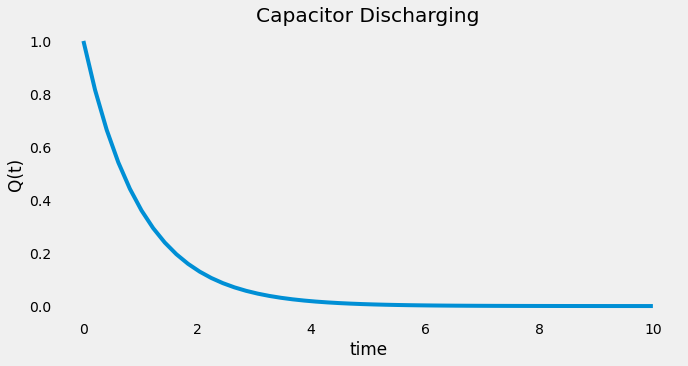

In [2]:
# 
T = 3
# create range of time as array
time_array = np.linspace(0,10)
# inital values
Q_0 = 1
Rval=1
Cval=1
# determine equation for charge
Qt = Q_0*np.exp(-Rval*Cval*time_array)

# change size of plot
plt.figure(figsize=(10,5))
# plot time vs. charge
plt.plot(time_array, Qt)
# 
plt.grid(alpha=0.25)
# label x axis
plt.xlabel("time")
# label y axis
plt.ylabel("Q(t)")
# label entire graph
plt.title("Capacitor Discharging");

Now, the question is:
Can we get `solve_ivp` to give us the same result?
We will follow these steps:
1. Put our equation(s) here 
2. Define the function `solve_ivp` needs to use
3. Define the time range 
4. Define the initial condition(s)
5. Set up parameters for the model
6. Call `solve_ivp`
7. Unpack the results and make a plot

Note that this problem is simple enough that step 1 is automatically done:
$$\frac{d Q(t)}{d t} = -RC Q(t)$$

#### 1.2 [6 Points] 
Change all of the comments in the following code by replacing each "X" with the correct step from above and explain _why_ this step is needed (use as many lines for the comments as you need).
You do not need to change the code itself.

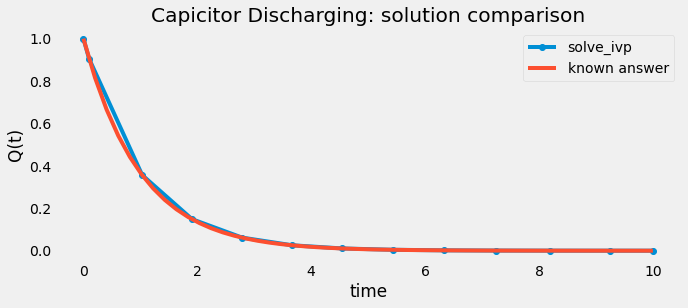

In [3]:
# step 1
# create function to calculate derivatives
def capacitor_discharge(time_in, current_value, R_in, C_in): 
    # return dQdt =-RC Q
    return -R_in*C_in*current_value

# step 2
# define time range
time_range = [0, 10]

# step 3
# identify starting values
initial_conditions = [Q_0]

# step 4
# determine parameters for the model
my_parameter = [Rval, Cval]

# step 5
# call solve_ivp
my_solution = solve_ivp(capacitor_discharge,  # store the equations of our model
                        time_range,           # when to start and when to end
                        initial_conditions,   # where we want to start from
                        args=(my_parameter))  # parameters for the model

# step 6
# graph the function
plt.figure(figsize=(10,4))
plt.plot(my_solution.t, my_solution.y[0], 'o-', label='solve_ivp')
plt.plot(time_array, Qt, label='known answer')
plt.grid(alpha=0.1)
plt.xlabel("time")
plt.ylabel("Q(t)")
plt.title("Capicitor Discharging: solution comparison")
plt.legend();

##### 1.3 [5 Points] 
Do the results from your two different methods agree? If they don't, how do they differ? 
How can you improve the agreement between the two solutions given above? 
**Show your reasoning, code, and updated results below.** 

<font size=+3>&#9998;</font> The two models do agree, however, they differ slightly. solve_ivp connects the points with a straight line, but the known answer connects the points without straight lines to each point.

Inreasing the time_array in the first cell, and the time_range in the cell below will improve the agreement between the two solutions given because increasing the time gives more data to compare, thus making the models more accurate.

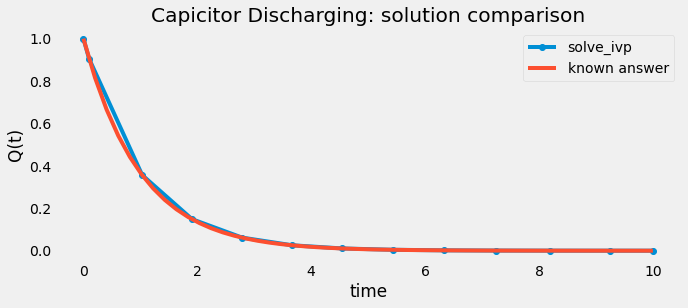

In [10]:
def capacitor_discharge(time_in, current_value, R_in, C_in): 
    # return dQdt =-RC Q
    return -R_in*C_in*current_value

time_range = [0, 10]

initial_conditions = [Q_0]

my_parameter = [Rval, Cval]

my_solution = solve_ivp(capacitor_discharge,  
                        time_range,           
                        initial_conditions,   
                        args=(my_parameter))  

plt.figure(figsize=(10,4))
plt.plot(my_solution.t, my_solution.y[0], 'o-', label='solve_ivp')
plt.plot(time_array, Qt, label='known answer')
plt.grid(alpha=0.1)
plt.xlabel("time")
plt.ylabel("Q(t)")
plt.title("Capicitor Discharging: solution comparison")
plt.legend();

____
____

## Part 2: Modeling a spring 

Great work so far! Let's ramp this up a bit. 

In this exercise, we are going to simulate how spring moves.
You can see a simple simulation here:
https://www.myphysicslab.com/springs/single-spring-en.html

We will need to keep track of two variables: the position of the block, $x(t)$, and its velocity, $v(t)$.
The change of the position $x$ is related to the velocity via 

$$\frac{d x(t)}{dt} = v(t)$$

The change of the velocity is proportional to the spring force 
$$\frac{d v(t)}{dt} = -k x(t)$$
where $k$ is the spring constant (telling us how stiff the spring is).

To describe the position and velocity of the spring, we will follow these steps:
1. Put our equation(s)  (3 points)
2. Define the function `solve_ivp` needs to use (2 points)
3. Define the time range 
4. Define the initial condition(s) 
5. Set up parameters for the model
6. Call `solve_ivp` (4 points)
7. Unpack the results and make a plot (4 points)

In the cells below, following the step guideline to finish the simulation. 
----

* Step 1: Put our equation(s) in here  (2 points)

<font size=+3>&#9998;</font> 
dxtdt = v(t)
dvtdt = -k*x(t)

In [95]:
# Step 2: Define the function solve_ivp needs to use (3 points)
# Your code below:

def spring_simulation(t, curr_vals, k):
    x,v = curr_vals
    dxdt = v
    dvdt = -k*x
    return dxdt, dvdt

In [96]:
# Step 3: Define the time range 
tend=100
time_array = np.linspace(0, tend, 1000) 
time_range = [0,tend]

In [97]:
# Step 4: Define the initial condition(s) 
first_initial_conditions = [0.2, 0.2]

In [101]:
# Step 5: Set up parameters for the model
k = 0.5

In [102]:
# Step 6: Call `solve_ivp` (4 points)
# Your code below:
sol = solve_ivp(spring_simulation, time_range, first_initial_conditions, t_eval = time_array, args=[k])

Text(0, 0.5, 'velocity')

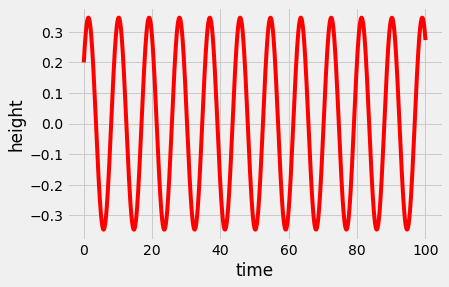

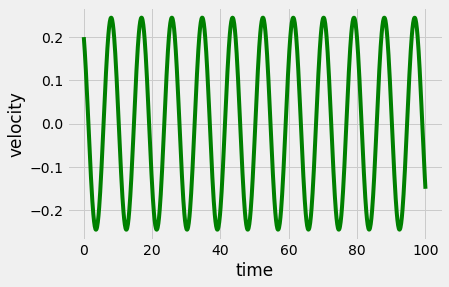

In [103]:
# Step 7: Unpack the results and make a plot (4 points)
# Your code below:
x = sol.y[0,:]
v = sol.y[1,:]

plt.figure(1)
plt.plot(time_array, x, color = 'red')
plt.xlabel('time')
plt.ylabel('height')


plt.figure(2)
plt.plot(time_array, v, color = 'green')
plt.xlabel('time')
plt.ylabel('velocity')

**Question:** What happens if you change the spring constant by a factor of 5? 

If the sping constant increased by a factor of 5, the graph becomes more compressed. If the spring factor decreased by a factor of 5, the graph will become less compressed and more spread out.

## Part 3: Modeling house temperatures floor by floor
____


Consider a typical house with an attic, basement and insulated main floor. 
Usually, the main living area where people's activities are located is surrounded with insulation, but not the attic and ceiling. 

Let us analyze the changing temperatures in the three levels using the following variables:

- $T_a(t)$: Temperature in the attic
- $T_m(t)$: Temperature in the main living area
- $T_b(t)$: Temperature in the basement
- $t$: Time in hours

In Michigan, we are approaching winter, and the temperature outside is getting colder and colder.  
Unfortunately, a polar vortex hits our model house while the heater is off because the family is away visiting relatives in another state.
After several days, the temperatures inside the house have been dropped to same as the as outdoor temperature, $25^\circ\text{F}$, except for the basement (due to the surrounding earth), which is slightly warmer, $30^\circ\text{F}$. 
When the family returns, they are unable to fix the main heater immediately. 
Instead, they turn on a small electric heater with its thermostat set to 80°F.
When the heater is running, it provides a $r=15^\circ\text{F}/\text{h}$ rise per hour. 
To simulate how the temperature changes in this house, we can use something called "Newton's cooling law":

$$\text{Rate of temperature change} = k\times \text{Temperature difference}$$

applied to the five boundary surfaces, which have different insulation constants $k$:

- $k_0=0.5$ for the basement walls floor, 
- $k_1=0.5$ for the basement ceiling,
- $k_2=0.25$ for the main floor walls, 
- $k_3=0.25$ for the main  floor ceiling, 
- $k_4=0.5$  for the attic walls and ceiling. 

Newton's cooling law says that the temperatures in these 3 areas of the house are related via
$$\frac{T_b(t)}{dt} = k_0 (T_b(0)-T_b(t)) +k_1(T_m(t)-T_b(t))$$
$$\frac{T_m(t)}{dt} =  k_1 (T_b(t) -T_m(t)) + k_2 ( T_m(0)-T_m(t)) + k3(T_a(t)-T_m(t))+ r $$
$$\frac{T_a(t)}{dt} =  k_3 (T_m(t)T-T_a(t)) + k_4(T_a(0)-T_a(t))$$
$T_b(0)$, $T_m(0)$ and $T_a(0)$ are the initial temperature at basement, main floor and attic, when the heater first turned on; they are $25^\circ\text{F}$, $25^\circ\text{F}$, and $30^\circ\text{F}$ respectively. 

We would like to know how the temperatures in the 3 areas changes over the next 24 hours. Assume the outside temperatures remain constant due to that polar vortex.

Your task is to code this model using `solve_ivp`, by following these steps:
1. Put our equations here (3 points)
2. Define the function `solve_ivp` needs to use (2 points)
3. Define the time range 
4. Define the initial conditions
5. Set up parameters for the model
6. Call `solve_ivp` (4 points)
7. Unpack the results and make a plot (4 points)

In the cells below, following the step guideline to finish the simulation. 
-----------

* Step 1: Put our equation(s) here  (2 points)

<font size=+3>&#9998;</font> *your equation(s) here*

In [105]:
# Step 2: Define the function solve_ivp needs to use (3 points)
# Your code below:

def heat_simulation(t, curr_vals, ks, T0s, r):
    # "ks" is a list of insulation constants in the order of k0, k1,k2...k4
    # "T0s" is a list the initial temperature for basement, main floor and attic at the time when the heater turned on
    
    # fill in the missing code and comments
    T_b = curr_vals[0] # temperatue of the basement at time t 
    T_m = curr_vals[1]
    T_a = curr_vals[2]
    
    k0 = ks[0]
    k1 = ks[1]
    k2 = ks[2]
    k3 = ks[3]
    k4 = ks[4]
    
    Tb_0 = T0s[0]
    Tm_0 = T0s[1]
    Ta_0 = T0s[2]
    
    dTbdt = k0*(Tb_0-  T_b) + k1*(T_m - T_b)
    dTmdt = k1*(T_b - T_m) + k2*(Tm_0 - T_m) + k3*(T_a - T_m) + r
    dTadt = k3*(T_m - T_a) + k4*(Ta_0 - T_a)
    
    # return the current derivatives back to solve_ivp: dTbdt, dTmdt, dTadt
    return dTbdt, dTmdt, dTadt

In [106]:
# Step 3: Define the time range 
tend=24 # 24 hours 
time_array = np.linspace(0, tend, 1000) 
time_range = [0,tend]

In [116]:
# Step 4: Define the initial condition(s) 
T0s=[25,25,30]  #in order of basement, main, and attic respectively

In [117]:
# Step 5: Set up parameters for the model
ks=[0.5,0.5,0.25,0.25,0.5]
r=15 #F/hr 

In [118]:
# Step 6: Call `solve_ivp` (4 points)
# Your code below:
sol = solve_ivp(heat_simulation, time_range, T0s, args=(ks,T0s,r))

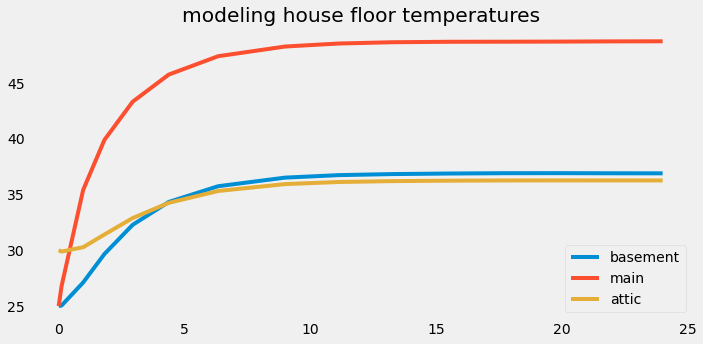

In [119]:
# Step 7: Unpack the results and make a plot (4 points)
# Your code below:
plt.figure(figsize=(10,5))
plt.plot(sol.t, sol.y[0], '', label = 'basement')
plt.plot(sol.t, sol.y[1], '', label = 'main')
plt.plot(sol.t, sol.y[2], '', label = 'attic')
plt.title('modeling house floor temperatures')
plt.legend()
plt.grid()
plt.tight_layout()

**Question (2 points):** What can you do to raise the temperature of the main floor higher or faster.  
Put your code below to show a different results from the above parameter setting 

To raise the temperature of the main floor faster, change the r to a higher number value because then the rate at which temperature changes per hour gets higher, making the room warmer faster. Similarly, to lower the temperature of the main floor faster, change the r value to a lower number value because then the rate at which temperature changes per hour gets lower, making the room warmer slower.

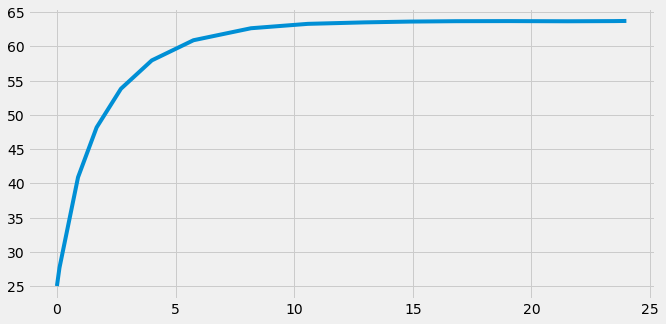

In [120]:
# code here 
plt.figure(figsize=(10,5))
r=25
sol = solve_ivp(heat_simulation, time_range, T0s, args=(ks,T0s,r))
plt.plot(sol.t, sol.y[1], '', label = 'main')

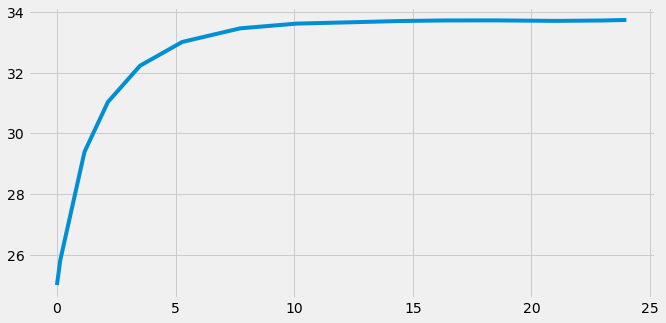

In [121]:
plt.figure(figsize=(10,5))
r=5
sol = solve_ivp(heat_simulation, time_range, T0s, args=(ks,T0s,r))
plt.plot(sol.t, sol.y[1], '', label = 'main')

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  
Go to the "Homework Assignments" section, find the appropriate submission folder link, and upload it there.


&#169; Copyright 2021, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.